Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

### Importing the data set

In [2]:
df_mat=pd.read_csv('student-mat.csv', sep=';')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Data Exploration

In [3]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df_mat.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

In [5]:
#df_por.info()

In [6]:
numerical=df_mat.select_dtypes(include=['number'])
numerical.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [7]:
string=df_mat.select_dtypes(include=['object'])
string.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


### Data quality analysis 
•	Missing values
•	Extremes
•	Distribution of each variable
•	Value transformation (missing values, extremes) 
•	Comments with conclusions



In [8]:
#Missing values
df_mat.isnull().sum().sum()

0

In [10]:
#Duplicates
df_mat[df_mat.duplicated()].shape

(0, 33)

In [11]:
#Distribution of each variable
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
var_range=[]
IQR=[]
var_coef=[]
std=[]
var=[]
mean=[]

for i in range(numerical.shape[1]):
    var_range.append(numerical.iloc[:,i].max()-numerical.iloc[:,i].min())

for i in range(numerical.shape[1]):
    IQR.append(numerical.iloc[:,i].quantile(0.75)-numerical.iloc[:,i].quantile(0.25))
    
for i in range(numerical.shape[1]):
    std.append(numerical.iloc[:,i].std())

for i in range(numerical.shape[1]):
    var.append(numerical.iloc[:,i].var())
    
for i in range(numerical.shape[1]):
    mean.append(numerical.iloc[:,i].mean())

for i in range(numerical.shape[1]):
    var_coef.append(round(numerical.iloc[:,i].std()/numerical.iloc[:,i].mean()*100,3))

data={
    'Varianton range' : var_range,
     'IQR' : IQR,
    'Standard deviation' : std,
    'Variance' : var,
    'Mean' : mean,
    'Variation coefficient' : var_coef
}
index=list(numerical.columns)

Statistical_dispersion=pd.DataFrame(data=data, index=index)
Statistical_dispersion

,Varianton range,IQR,Standard deviation,Variance,Mean,Variation coefficient
age,7,2.0,1.276043,1.628285,16.696203,7.643
Medu,4,2.0,1.094735,1.198445,2.749367,39.818
Fedu,4,1.0,1.088201,1.184180,2.521519,43.157
traveltime,3,1.0,0.697505,0.486513,1.448101,48.167
studytime,3,1.0,0.839240,0.704324,2.035443,41.231
failures,3,0.0,0.743651,0.553017,0.334177,222.532
famrel,4,1.0,0.896659,0.803997,3.944304,22.733
freetime,4,1.0,0.998862,0.997725,3.235443,30.872
goout,4,2.0,1.113278,1.239388,3.108861,35.810
Dalc,4,1.0,0.890741,0.793420,1.481013,60.144


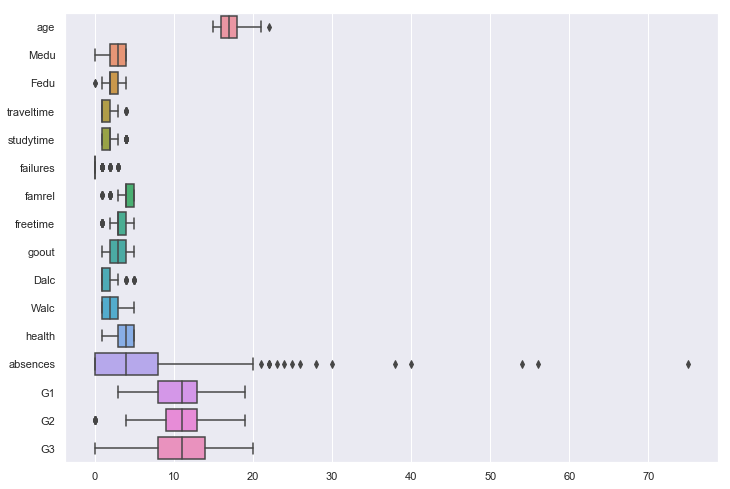

In [14]:
#Outliers
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df_mat, orient="h")

In [15]:
# Frequency

for i in range(df_mat.shape[1]):
    print(df_mat.iloc[:,i].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
0    312
1  

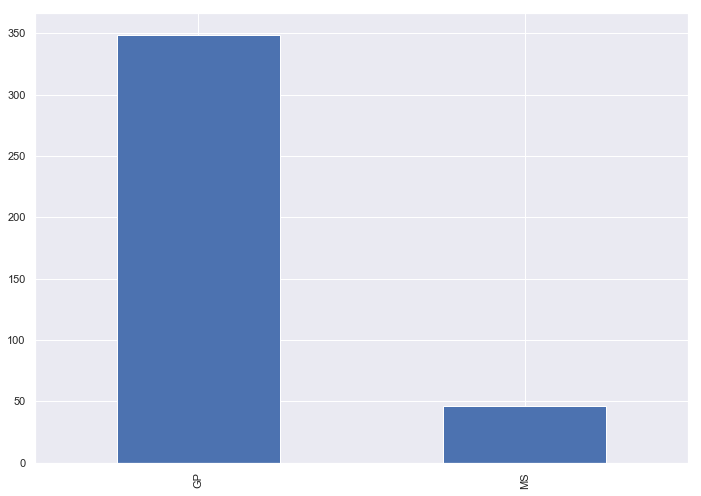

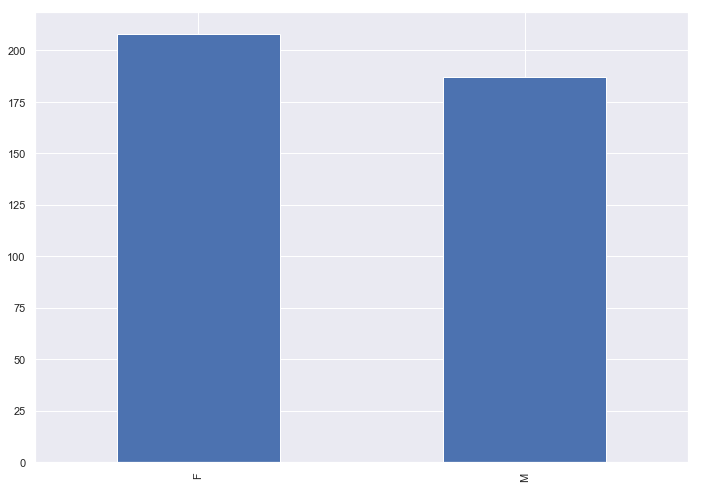

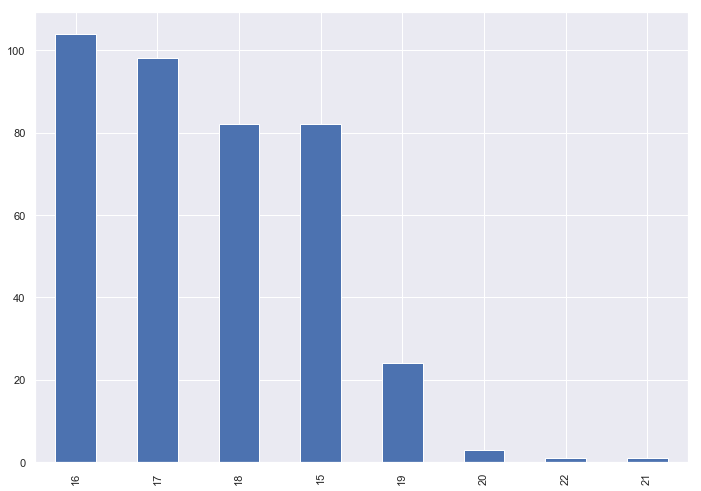

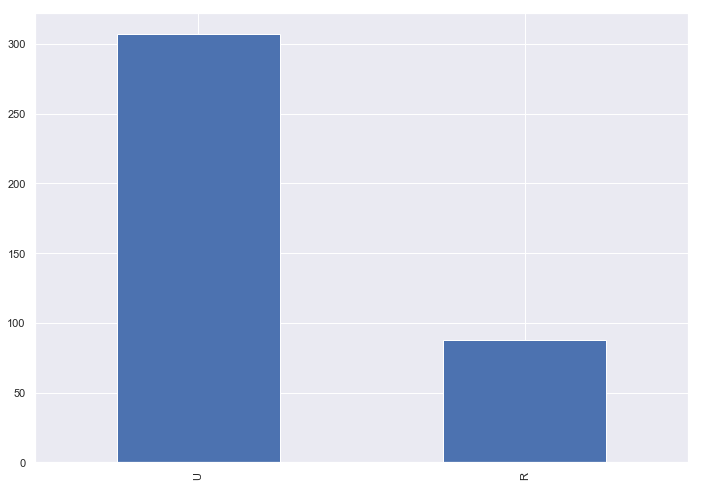

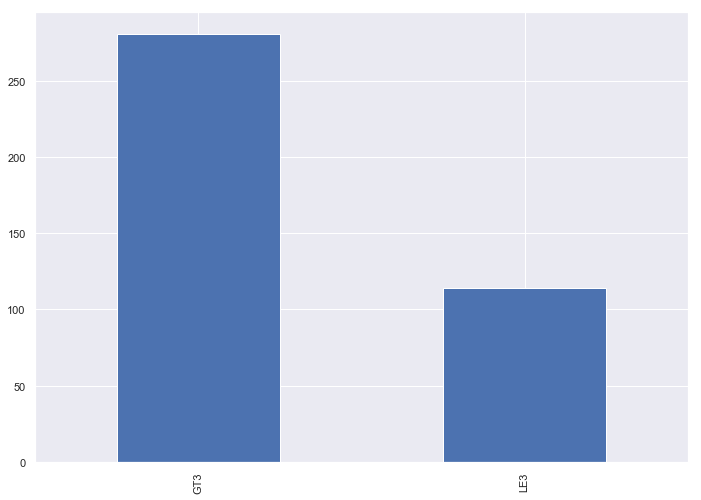

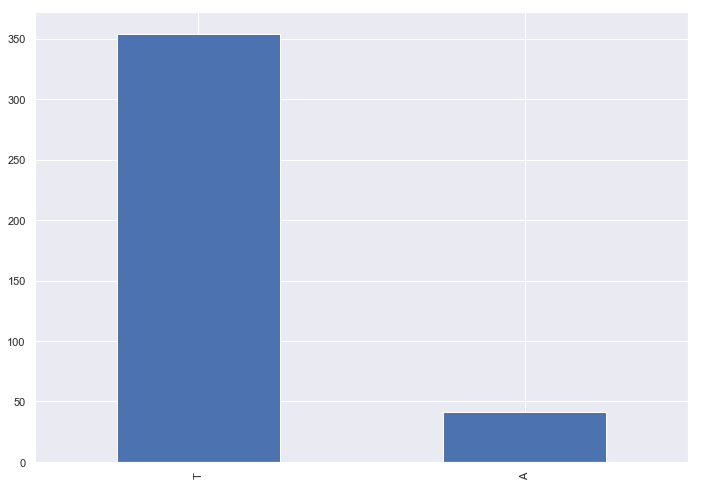

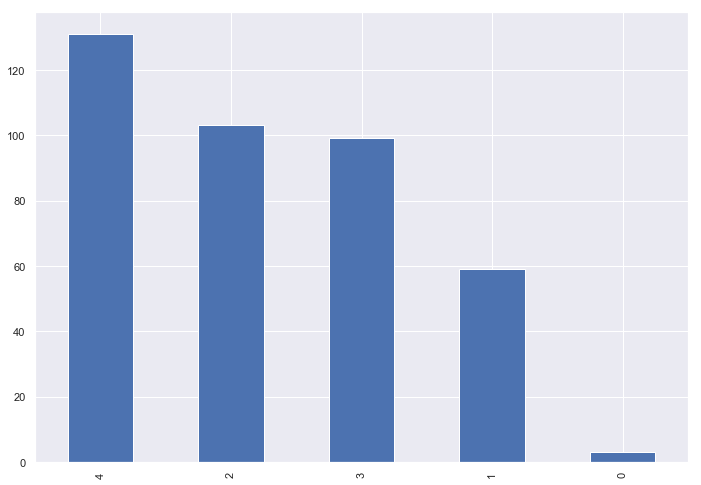

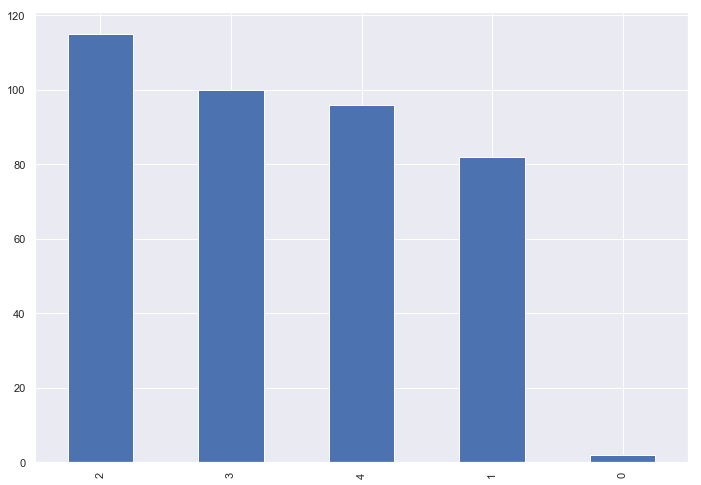

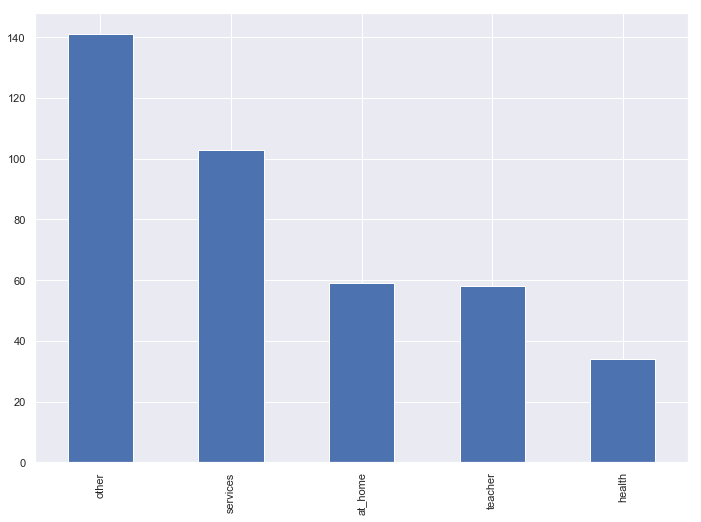

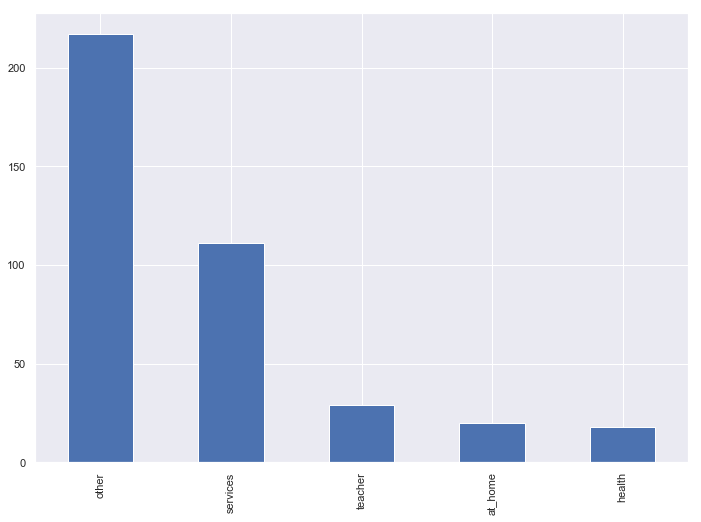

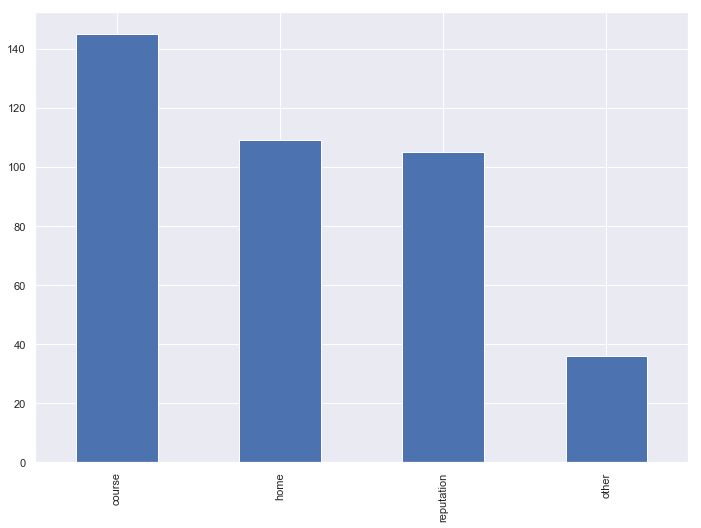

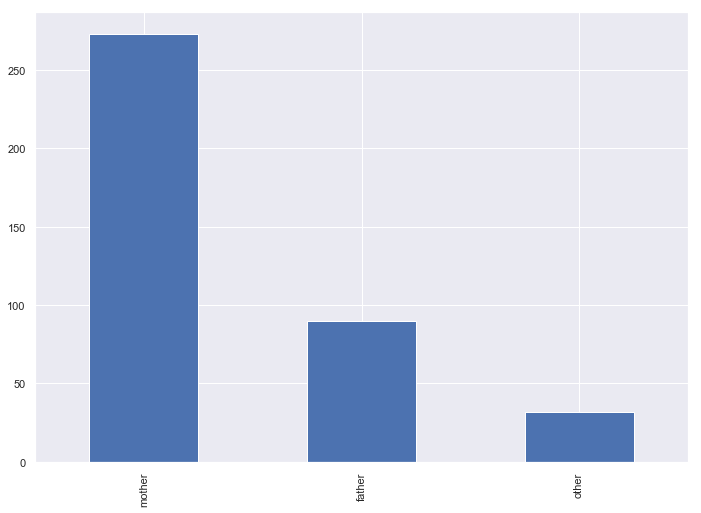

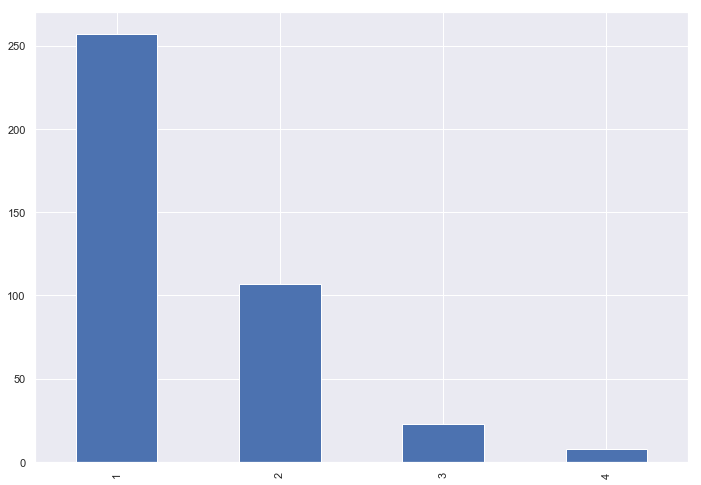

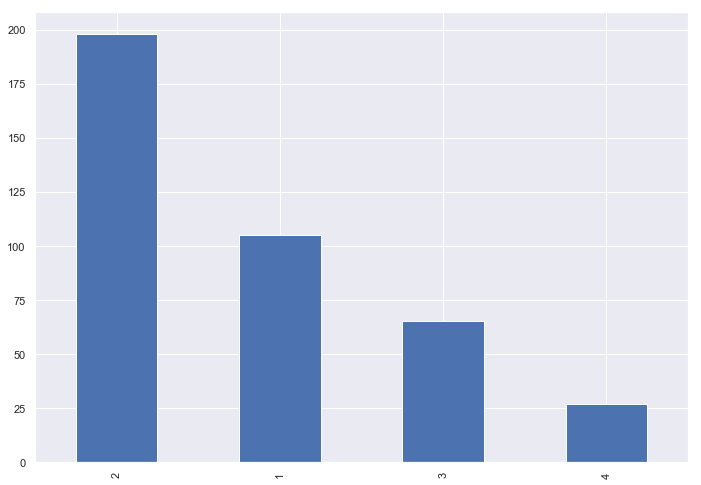

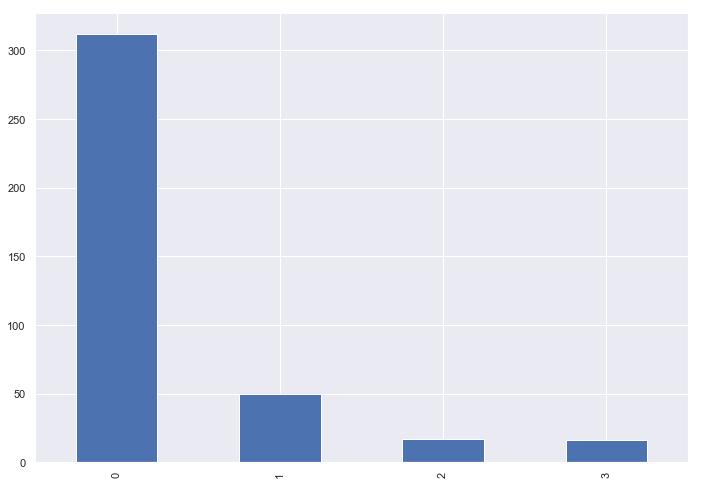

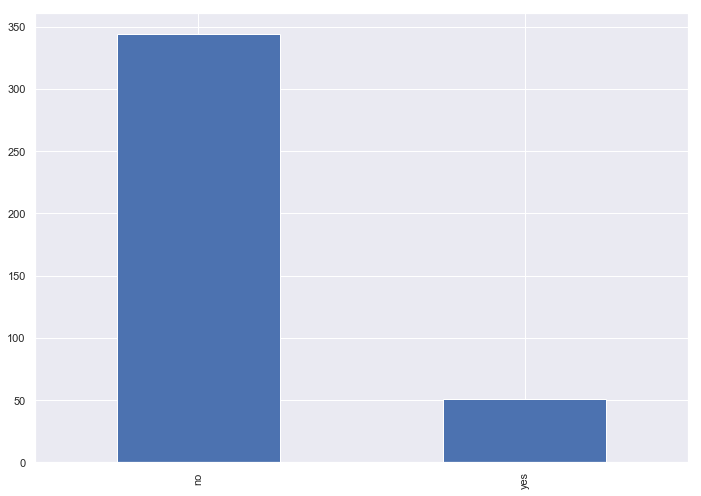

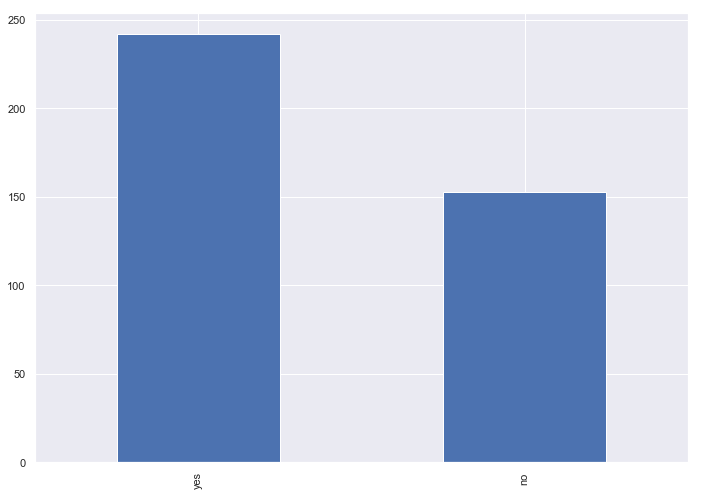

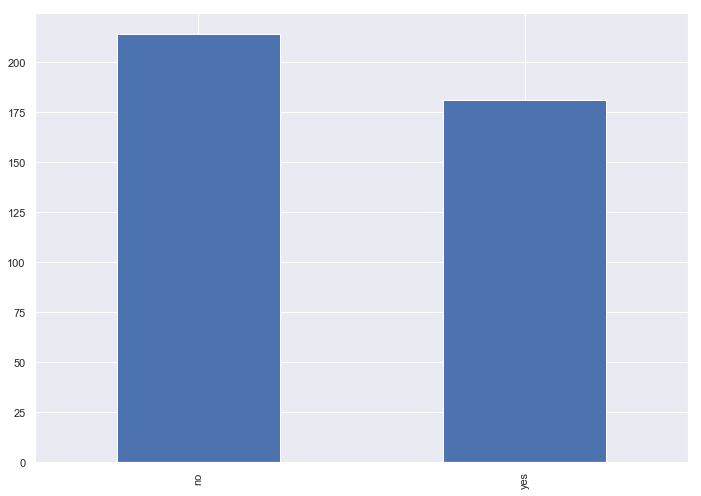

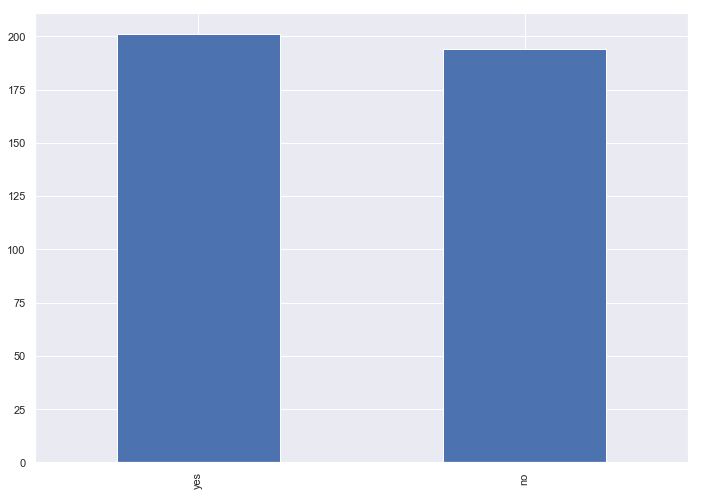

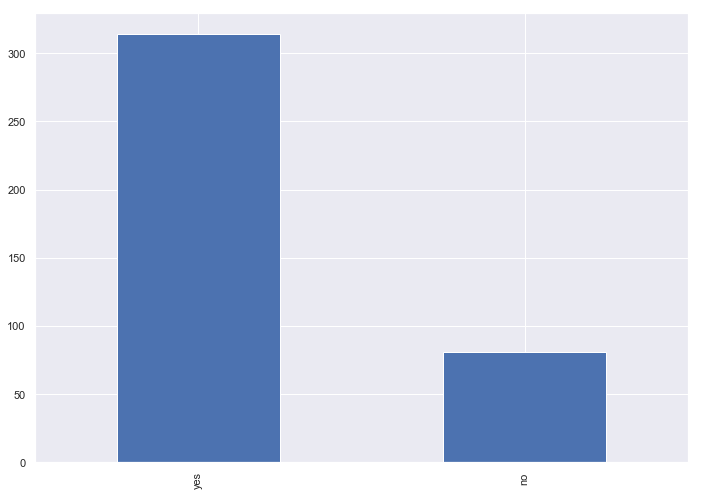

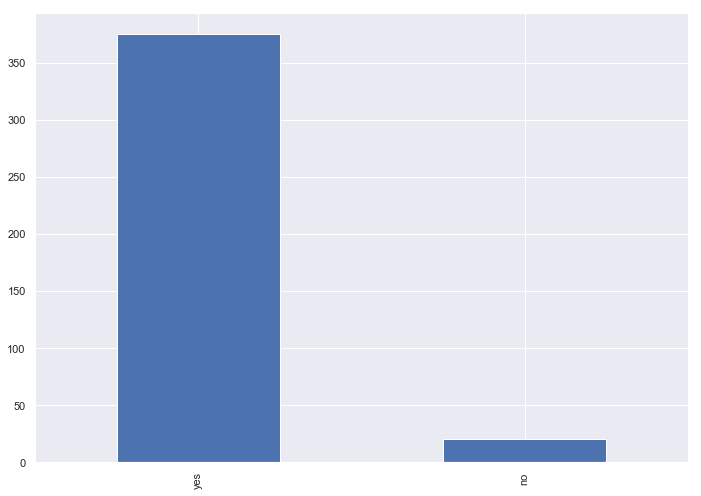

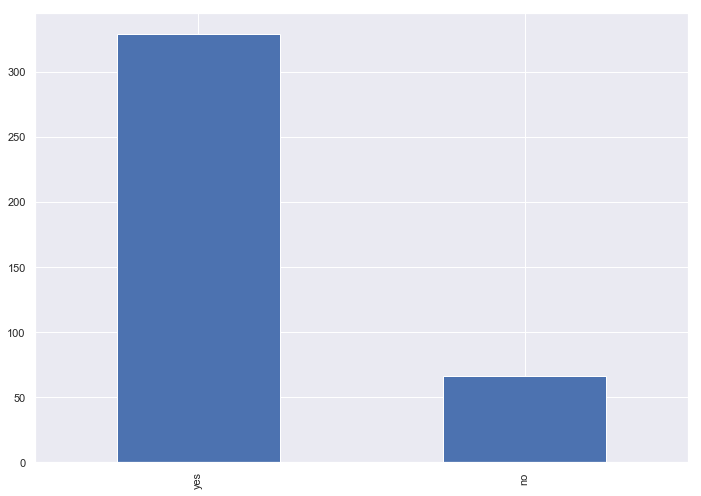

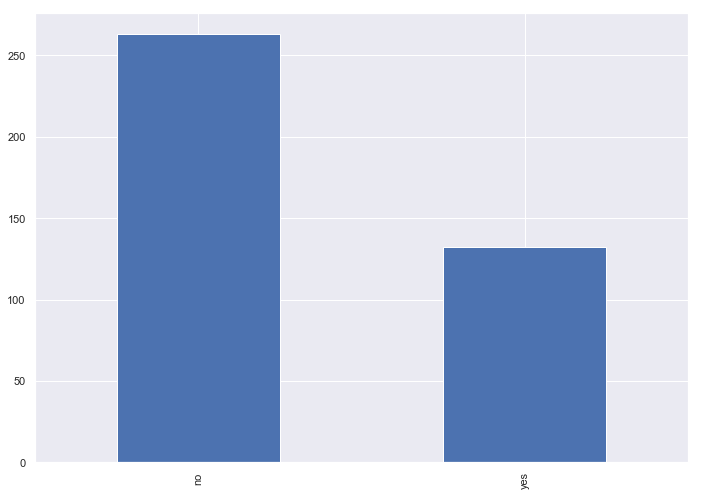

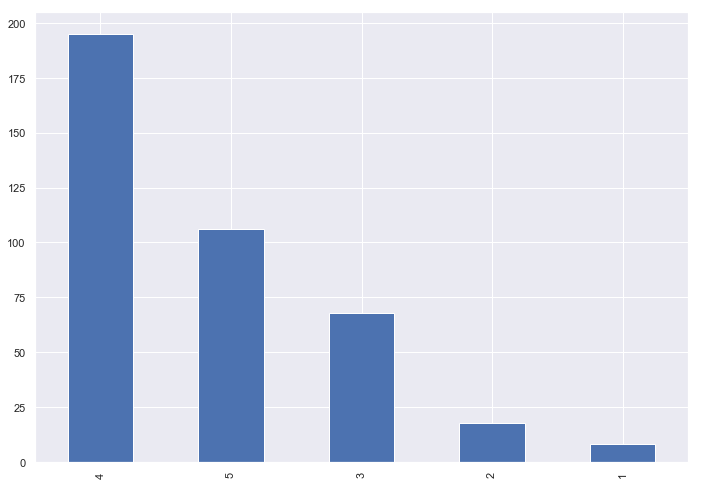

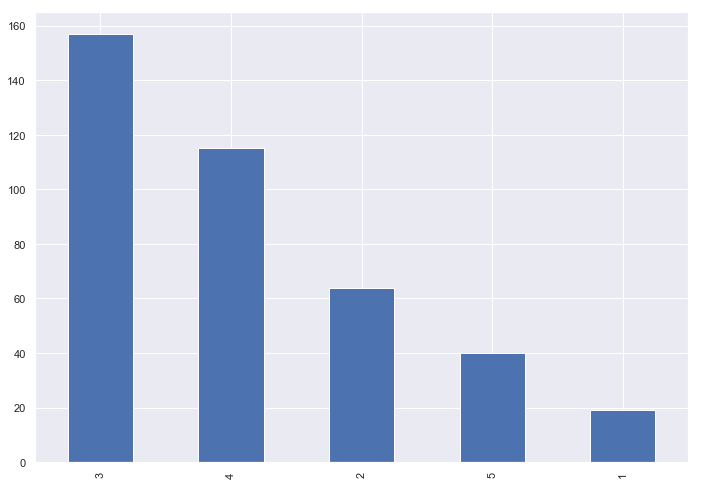

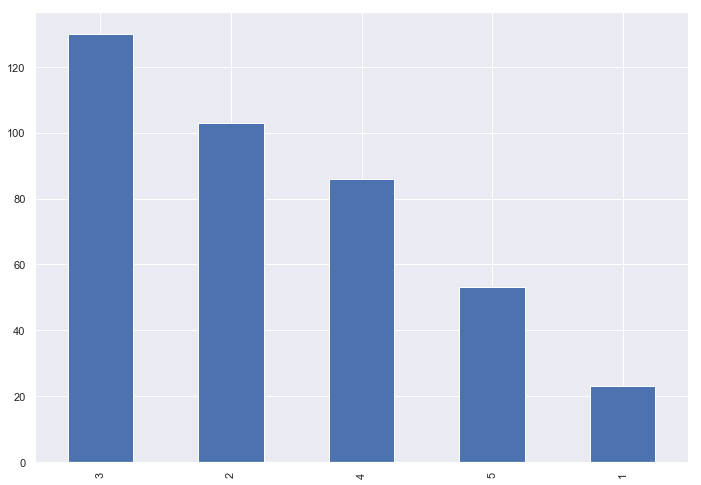

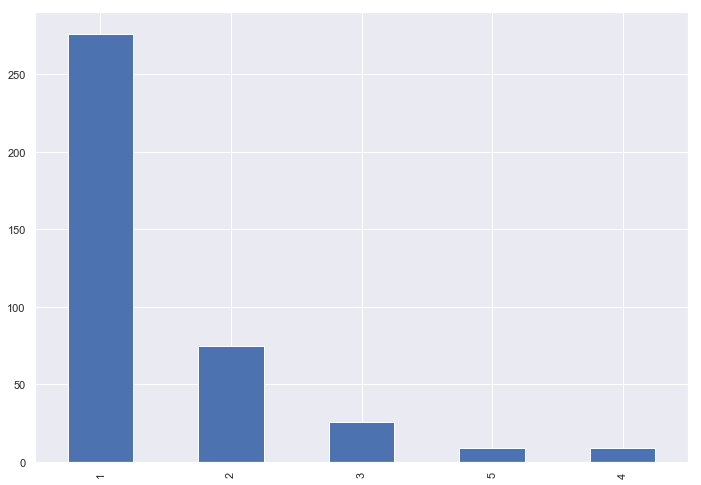

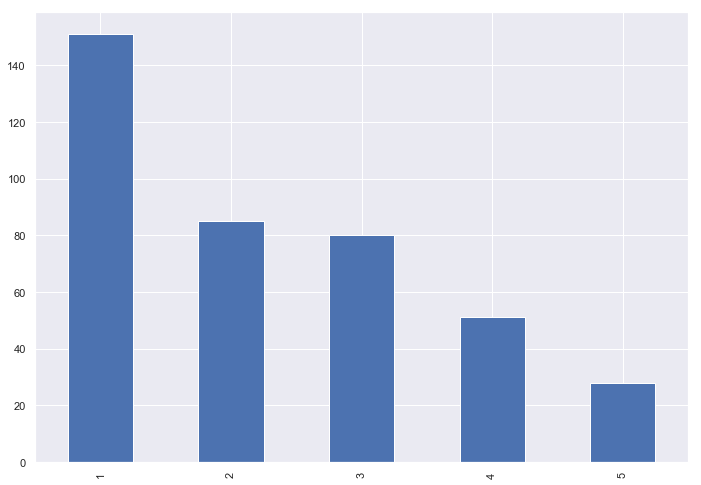

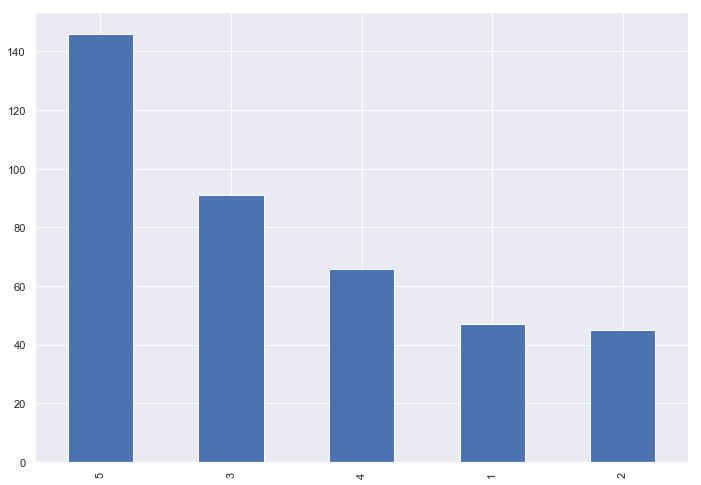

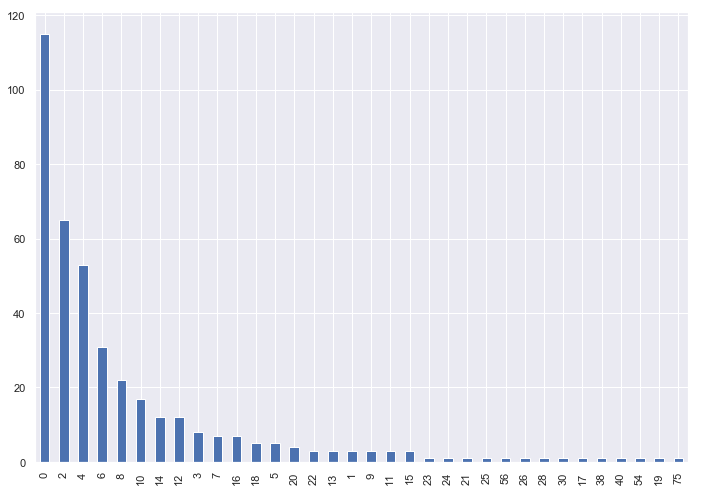

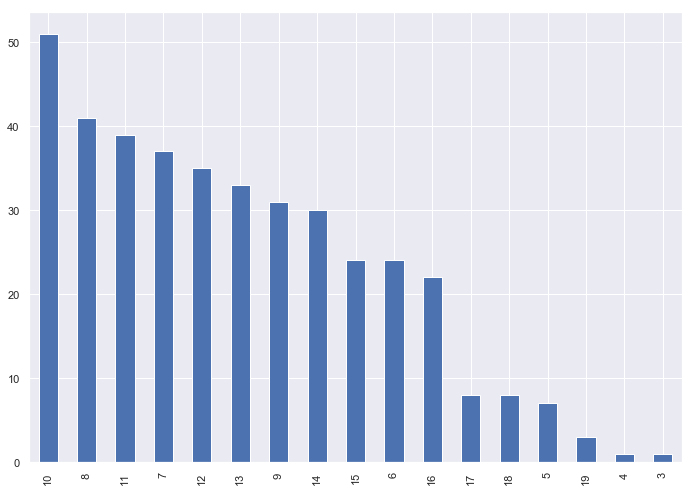

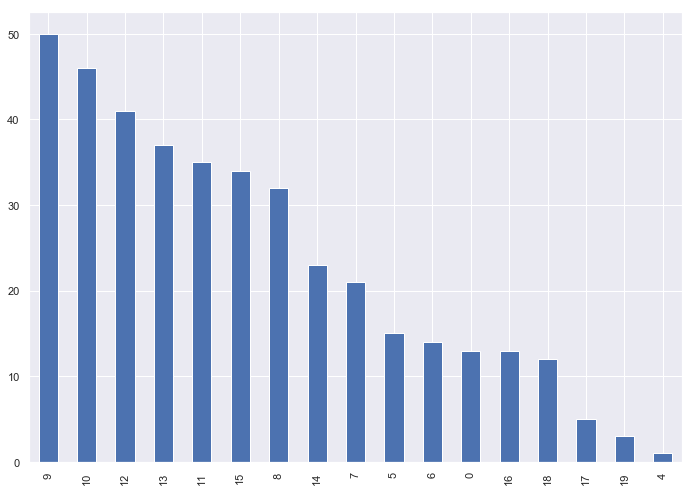

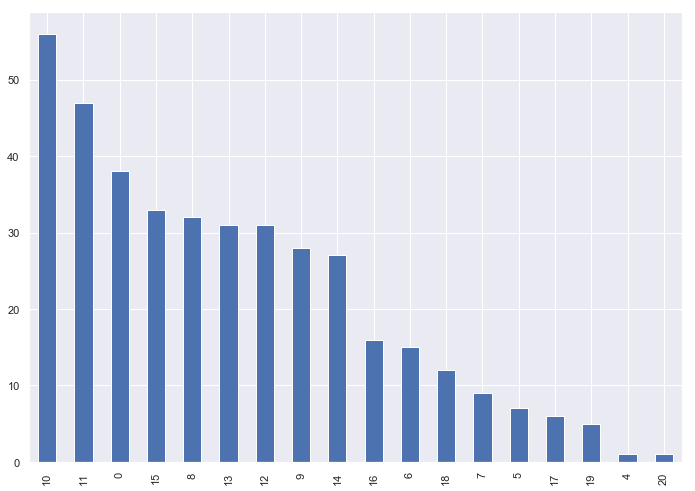

In [17]:
for i in range(df_mat.shape[1]):
    df_mat.iloc[:,i].value_counts().plot('bar')
    plt.show()

Text(0.5, 1.0, 'G3')

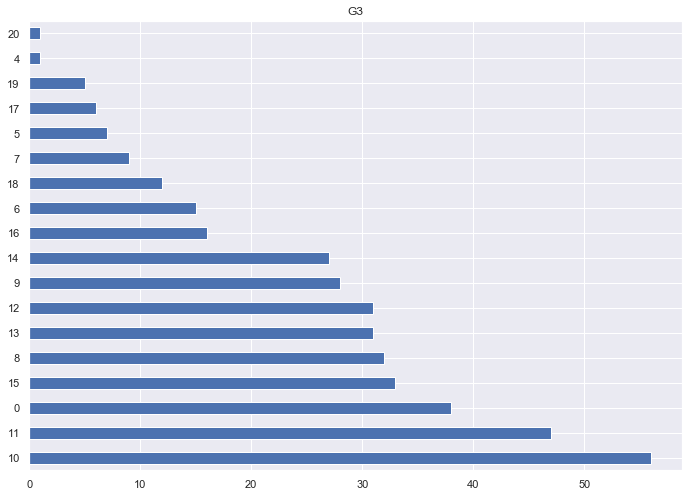

In [18]:
df_mat.iloc[:,32].value_counts().plot('barh')
plt.title('G3')

https://etav.github.io/python/count_basic_freq_plot.html

### Univariant analysis
•	WoE, IV for each variable
•	Selection of most predictive variables
•	Coarse classing – grouping by WoE
•	Story telling – problem description


#### WoE, IV for each variable

In [19]:
# set a target variable
df_mat['target'] = df_mat['G3']
df=df_mat.drop('G3',axis=1)

In [20]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
df['target'].sort_values(ascending=True).value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: target, dtype: int64

In [22]:
a=(df['target']==0).value_counts()
round(a[1]/df['target'].value_counts().sum()*100,2)

9.62

9.62 is the percentage of 0 final grades. The important thing is to correctly divide target variable into binary mode. In the dataset "student grades Por" target variable was divided in half having 10 as a passing mark. Here I would like to test the hipothesis that 0 mark means failure and everything above 0 means pass. This hypothesis is based on the fact that there are almost 10% of 0 marks from the total students, which seems realistic as for failure percentage. 

Just to mention, the number of 0 grades in "student grades Por" equals to 15.

In [23]:
df['target'] = (df['target']>0)
df['target'].value_counts()

True     357
False     38
Name: target, dtype: int64

In [24]:
df['target'] = df['target'].astype(int)
df['target'].value_counts()

1    357
0     38
Name: target, dtype: int64

In [25]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1


In [26]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [27]:
final_iv, IV = data_vars(df,df.target)

In [28]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,school,GP,GP,349,315,0.902579,34,0.097421,0.882353,0.894737,-0.013938,0.001550
1,school,MS,MS,46,42,0.913043,4,0.086957,0.117647,0.105263,0.111226,0.001550
2,sex,F,F,208,185,0.889423,23,0.110577,0.518207,0.605263,-0.155288,0.030869
3,sex,M,M,187,172,0.919786,15,0.080214,0.481793,0.394737,0.199295,0.030869
4,age,15,16,186,173,0.930108,13,0.069892,0.484594,0.342105,0.348193,0.157370


In [29]:
IV.head()

,VAR_NAME,IV
0,Dalc,0.001212
1,Fedu,0.081750
2,Fjob,0.016663
3,G1,0.850177
4,G2,1.243662


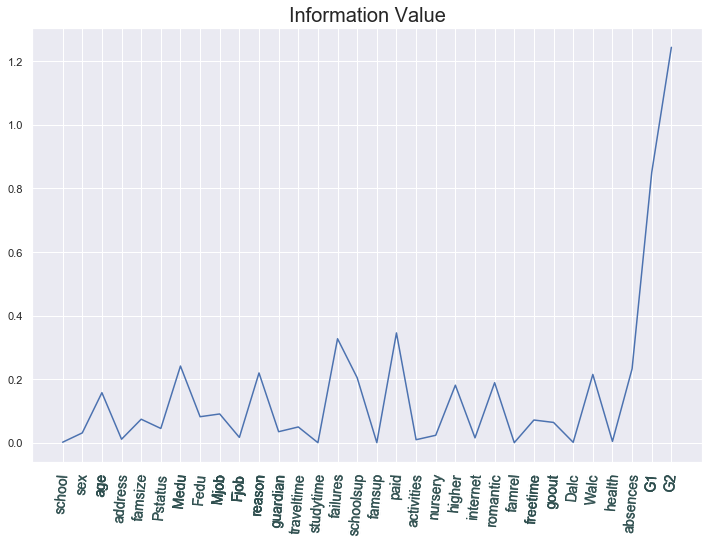

In [30]:
plt.figure(figsize=(12,8))
plt.plot(final_iv['VAR_NAME'], final_iv['IV'])
plt.title('Information Value', fontsize=20)
plt.xticks(final_iv['VAR_NAME'], rotation=85, fontsize=14, color='darkslategray' )
plt.show()

We see here that G1 and G2 attributes are highly correlated with the target variable and we should definitely exclude it from our predictive model because they can cause "over-predicting". We can see that Medu, reason, failuress, paid and Walc can be potentialy good predictors. For orientation, attributes with information value close to 0 do not have significant importance in relation with the target variable. 
- Less than 0.02	Not useful for prediction
- 0.02 to 0.1	Weak predictive Power
- 0.1 to 0.3	Medium predictive Power
- 0.3 to 0.5	Strong predictive Power
- more that 0.5	Suspicious Predictive Power

In [31]:
#plt.figure(figsize=(12,8))
#plt.bar(final_iv['VAR_NAME'],
          #  final_iv['IV'])
#plt.title('Information Value', fontsize=20)
#plt.xticks(final_iv['VAR_NAME'], rotation=85, fontsize=14, color='darkslategray' )
#plt.show()

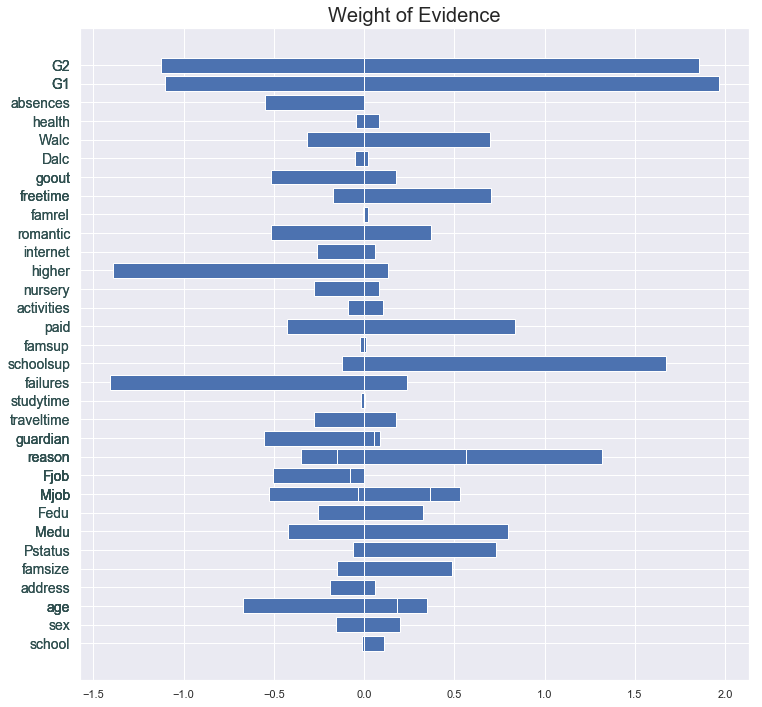

In [32]:
plt.figure(figsize=(12,12))
plt.barh(final_iv['VAR_NAME'],
            final_iv['WOE'])
plt.title('Weight of Evidence', fontsize=20)
plt.yticks(final_iv['VAR_NAME'], rotation=0, fontsize=14, color='darkslategray' )
plt.show()
# if woe is zero - skip it


In [33]:
IV.sort_values('IV',ascending=False).head(8)

,VAR_NAME,IV
4,G2,1.243662
3,G1,0.850177
24,paid,0.345356
13,failures,0.327119
5,Medu,0.241171
9,absences,0.232574
25,reason,0.219436
8,Walc,0.214814


In [34]:
final_iv.sort_values('WOE',ascending=False).head(8)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
76,G1,12,13,68,67,0.985294,1,0.014706,0.187675,0.026316,1.964543,0.850177
79,G2,10,12,122,120,0.983607,2,0.016393,0.336134,0.052632,1.854195,1.243662
43,schoolsup,yes,yes,51,50,0.980392,1,0.019608,0.140056,0.026316,1.671873,0.204288
31,reason,other,other,36,35,0.972222,1,0.027778,0.098039,0.026316,1.315198,0.219436
47,paid,yes,yes,181,173,0.955801,8,0.044199,0.484594,0.210526,0.833700,0.345356
16,Medu,4,4,131,125,0.954198,6,0.045802,0.350140,0.157895,0.796405,0.241171
12,Pstatus,A,A,41,39,0.951220,2,0.048780,0.109244,0.052632,0.730265,0.044830
62,freetime,5,5,40,38,0.950000,2,0.050000,0.106443,0.052632,0.704289,0.071375


The target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful 

####  Selection of most predictive variables

In [35]:
final_iv.query('0.3<= IV <= 0.5')

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
40,failures,0,1,362,334,0.922652,28,0.077348,0.935574,0.736842,0.238787,0.327119
41,failures,2,3,33,23,0.696970,10,0.303030,0.064426,0.263158,-1.407240,0.327119
46,paid,no,no,214,184,0.859813,30,0.140187,0.515406,0.789474,-0.426411,0.345356
47,paid,yes,yes,181,173,0.955801,8,0.044199,0.484594,0.210526,0.833700,0.345356


We can see that there are two attributes in a range 0.3-0.5. Failures show the number of past class failures (numeric: n if 1<=n<3, else 4), and paid shows if a student took paid additional classes or not. These two attributes seem logical to affect the final grade of a student. 

In [36]:
final_iv=final_iv.query('0.2<= IV <= 0.5')
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
14,Medu,0,2,165,142,0.860606,23,0.139394,0.397759,0.605263,-0.419817,0.241171
15,Medu,3,3,99,90,0.909091,9,0.090909,0.252101,0.236842,0.062435,0.241171
16,Medu,4,4,131,125,0.954198,6,0.045802,0.350140,0.157895,0.796405,0.241171
29,reason,course,course,145,126,0.868966,19,0.131034,0.352941,0.500000,-0.348307,0.219436
30,reason,home,home,109,97,0.889908,12,0.110092,0.271709,0.315789,-0.150345,0.219436
31,reason,other,other,36,35,0.972222,1,0.027778,0.098039,0.026316,1.315198,0.219436
32,reason,reputation,reputation,105,99,0.942857,6,0.057143,0.277311,0.157895,0.563211,0.219436
40,failures,0,1,362,334,0.922652,28,0.077348,0.935574,0.736842,0.238787,0.327119
41,failures,2,3,33,23,0.696970,10,0.303030,0.064426,0.263158,-1.407240,0.327119
42,schoolsup,no,no,344,307,0.892442,37,0.107558,0.859944,0.973684,-0.124220,0.204288


We can see 7 independent variables in a range of 0.2-0.5 IV. To failures and paid was added Medu which shows a mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education). Reason variable represents a reason of a student to choose the school (nominal: close to 'home', school 'reputation', 'course' preference or 'other'). Schoolsup - extra educational support (binary: yes or no). Walc -  weekend alcohol consumption (numeric: from 1 - very low to 5 - very high). Absences - number of school absences (numeric: from 0 to 93)

In [37]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'target'],
      dtype='object')

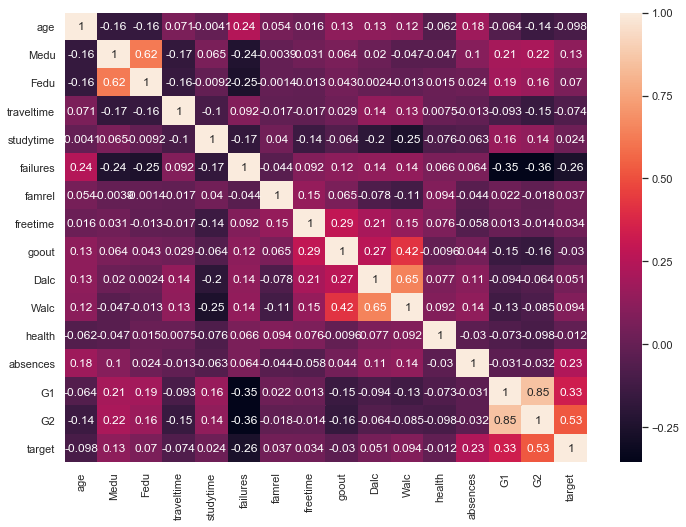

In [38]:
sns.heatmap(df.corr(), annot=True);

In [39]:
# DataFrame with attributes with the most predictive power
df_new=df.filter([ 'paid',
       'failures', 'target'])
df_new.head()

,paid,failures,target
0,no,0,1
1,no,0,1
2,yes,3,1
3,yes,0,1
4,yes,0,1


In [40]:
df_new.shape

(395, 3)

In [41]:
# DataFrame with attributes with good predictive power - created for comparison
df_new2=df.filter([ 'paid','Medu', 'reason', 'schoolsup', 'Walc', 'absences',
       'failures', 'target'])
df_new2.head()

,paid,Medu,reason,schoolsup,Walc,absences,failures,target
0,no,4,course,yes,1,6,0,1
1,no,1,course,no,1,4,0,1
2,yes,1,other,yes,3,10,3,1
3,yes,4,home,no,1,2,0,1
4,yes,3,home,no,2,4,0,1


### Preparation for predictive model
•	Correlation calculation
•	Variable reduction
•	Dummy variable creation


#### Correlation

In [42]:
df_new.corr()

,failures,target
failures,1.000000,-0.257801
target,-0.257801,1.000000


In [43]:
df_new2.corr()

,Medu,Walc,absences,failures,target
Medu,1.000000,-0.047123,0.100285,-0.236680,0.129380
Walc,-0.047123,1.000000,0.136291,0.141962,0.093871
absences,0.100285,0.136291,1.000000,0.063726,0.233023
failures,-0.236680,0.141962,0.063726,1.000000,-0.257801
target,0.129380,0.093871,0.233023,-0.257801,1.000000


We can see that variables are not exceeding the correlation +/- 0.3 with each other, so they can be left for further prediction model

### Dummy variables

In [44]:
df['paid'].value_counts()

no     214
yes    181
Name: paid, dtype: int64

In [45]:
dummy_paid=pd.get_dummies(df['paid'])
dummy_paid.columns = ['paid_yes', 'paid_no']
dummy_paid.head()

,paid_yes,paid_no
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [46]:
df_new_with_dummy=df_new.merge(dummy_paid, left_index=True, right_index=True)
df_new_with_dummy.head()

,paid,failures,target,paid_yes,paid_no
0,no,0,1,1,0
1,no,0,1,1,0
2,yes,3,1,0,1
3,yes,0,1,0,1
4,yes,0,1,0,1


In [47]:
df_ready=df_new_with_dummy.iloc[:,1:]
df_ready.head()

,failures,target,paid_yes,paid_no
0,0,1,1,0
1,0,1,1,0
2,3,1,0,1
3,0,1,0,1
4,0,1,0,1


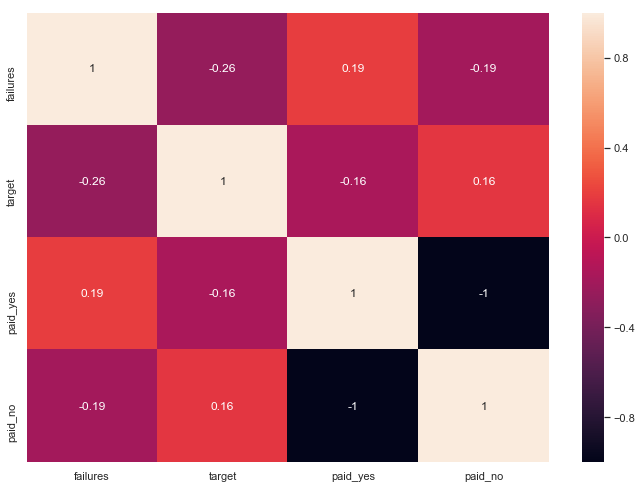

In [48]:
sns.heatmap(df_ready.corr(), annot=True);

In [49]:
# Get dummies
dummy_schoolsup = pd.get_dummies(df_new2['schoolsup'])
dummy_schoolsup.columns = ['schoolsup_yes', 'schoolsup_no']
dummy_schoolsup.head()

,schoolsup_yes,schoolsup_no
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [50]:
dummy_reason=pd.get_dummies(df_new2['reason'])
dummy_reason.columns = ['reason_course', 'reason_home', 'reason_other', 'reason_reputation']
dummy_reason.head()

,reason_course,reason_home,reason_other,reason_reputation
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [51]:
df_with_dummy2=df_new2.merge(dummy_reason, left_index=True, right_index=True)
df_with_dummy2=df_with_dummy2.merge(dummy_schoolsup, left_index=True, right_index=True)
df_with_dummy2=df_with_dummy2.merge(dummy_paid, left_index=True, right_index=True)
df_with_dummy2.head()

,paid,Medu,reason,schoolsup,Walc,absences,failures,target,reason_course,reason_home,reason_other,reason_reputation,schoolsup_yes,schoolsup_no,paid_yes,paid_no
0,no,4,course,yes,1,6,0,1,1,0,0,0,0,1,1,0
1,no,1,course,no,1,4,0,1,1,0,0,0,1,0,1,0
2,yes,1,other,yes,3,10,3,1,0,0,1,0,0,1,0,1
3,yes,4,home,no,1,2,0,1,0,1,0,0,1,0,0,1
4,yes,3,home,no,2,4,0,1,0,1,0,0,1,0,0,1


In [52]:
df_with_dummy2.columns

Index(['paid', 'Medu', 'reason', 'schoolsup', 'Walc', 'absences', 'failures',
       'target', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'schoolsup_yes', 'schoolsup_no', 'paid_yes',
       'paid_no'],
      dtype='object')

In [53]:
df_with_dummy2=df_with_dummy2.filter([ 'target','Medu', 'Walc', 'absences', 'failures', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'schoolsup_yes', 'schoolsup_no', 'paid_yes',
       'paid_no'])
df_with_dummy2.head()

,target,Medu,Walc,absences,failures,reason_course,reason_home,reason_other,reason_reputation,schoolsup_yes,schoolsup_no,paid_yes,paid_no
0,1,4,1,6,0,1,0,0,0,0,1,1,0
1,1,1,1,4,0,1,0,0,0,1,0,1,0
2,1,1,3,10,3,0,0,1,0,0,1,0,1
3,1,4,1,2,0,0,1,0,0,1,0,0,1
4,1,3,2,4,0,0,1,0,0,1,0,0,1


In [54]:
df_with_dummy2.corr()

,target,Medu,Walc,absences,failures,reason_course,reason_home,reason_other,reason_reputation,schoolsup_yes,schoolsup_no,paid_yes,paid_no
target,1.000000,0.129380,0.093871,0.233023,-0.257801,-0.089963,-0.029079,0.073483,0.079707,-0.100017,0.100017,-0.162195,0.162195
Medu,0.129380,1.000000,-0.047123,0.100285,-0.236680,-0.094435,-0.008708,0.008229,0.106487,0.036029,-0.036029,-0.159700,0.159700
Walc,0.093871,-0.047123,1.000000,0.136291,0.141962,0.015455,0.005574,0.092452,-0.082733,0.087152,-0.087152,-0.060454,0.060454
absences,0.233023,0.100285,0.136291,1.000000,0.063726,-0.165450,0.111061,-0.003873,0.070671,-0.022526,0.022526,-0.007435,0.007435
failures,-0.257801,-0.236680,0.141962,0.063726,1.000000,0.032136,0.042511,-0.012203,-0.070127,0.000437,-0.000437,0.188039,-0.188039
reason_course,-0.089963,-0.094435,0.015455,-0.165450,0.032136,1.000000,-0.470158,-0.241167,-0.458258,0.011301,-0.011301,0.173332,-0.173332
reason_home,-0.029079,-0.008708,0.005574,0.111061,0.042511,-0.470158,1.000000,-0.195494,-0.371472,0.001240,-0.001240,-0.080175,0.080175
reason_other,0.073483,0.008229,0.092452,-0.003873,-0.012203,-0.241167,-0.195494,1.000000,-0.190546,0.017001,-0.017001,-0.061857,0.061857
reason_reputation,0.079707,0.106487,-0.082733,0.070671,-0.070127,-0.458258,-0.371472,-0.190546,1.000000,-0.024661,0.024661,-0.067699,0.067699
schoolsup_yes,-0.100017,0.036029,0.087152,-0.022526,0.000437,0.011301,0.001240,0.017001,-0.024661,1.000000,-1.000000,-0.020753,0.020753


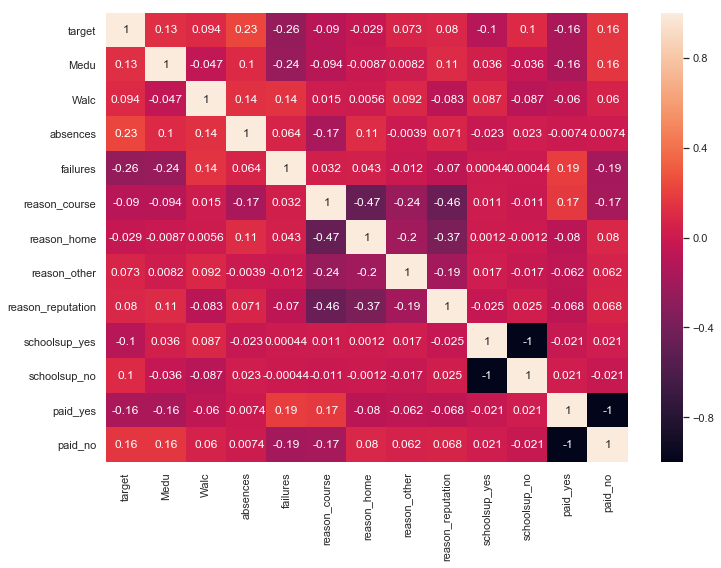

In [55]:
sns.heatmap(df_with_dummy2.corr(), annot=True)

### Model development with the best predictors
•	Logistic regression
•	Probability calculation based on logistic regression


### Logistic Regression

#### split data into train and test

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [57]:
df_ready.columns

Index(['failures', 'target', 'paid_yes', 'paid_no'], dtype='object')

In [91]:
X=df_ready.filter([  'failures','paid_yes', 'paid_no'])
y=df_ready.target

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [93]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
predictions

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9113924050632911


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.91      1.00      0.95        72

   micro avg       0.91      0.91      0.91        79
   macro avg       0.46      0.50      0.48        79
weighted avg       0.83      0.91      0.87        79



C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))


Accuracy: 0.9113924050632911
Precision: 0.9113924050632911
Recall: 1.0


### confusion matrix 

In [65]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 0  7]
 [ 0 72]]


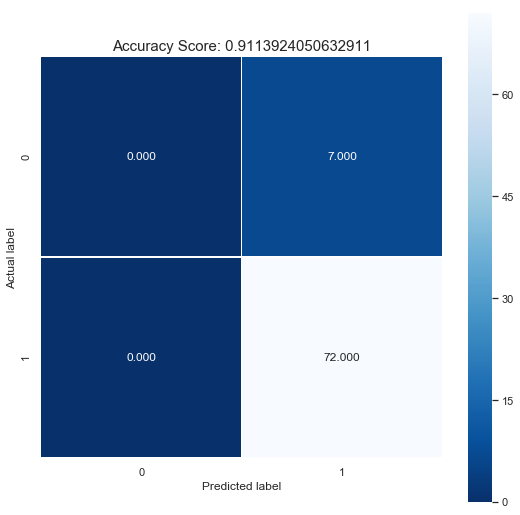

In [67]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The confusion matrix in the form of the array object. 
The dimension of this matrix is 2*2 because this model is binary classification (two classes 0 and 1). 
Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.
In the output, 72 are correct predictions, and 7 are incorrect predictions. 

True positive rate = TP/actual yes

### Model development with good predictors

In [81]:
X=df_with_dummy2.filter([ 'Medu', 'Walc', 'absences', 'failures', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'schoolsup_yes', 'schoolsup_no', 'paid_yes'])
y=df_with_dummy2.target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
predictions

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9873417721518988


In [84]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))

Accuracy: 0.9873417721518988
Precision: 0.9863013698630136
Recall: 1.0


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.99      1.00      0.99        72

   micro avg       0.99      0.99      0.99        79
   macro avg       0.99      0.93      0.96        79
weighted avg       0.99      0.99      0.99        79



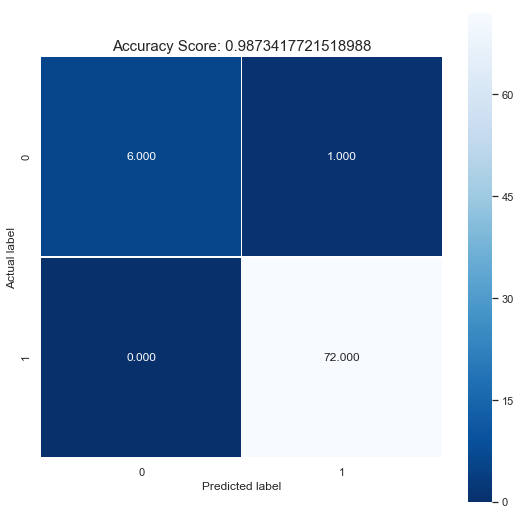

In [72]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Here we see that 72 (True positive) and 6 (true negative) are correct predictions, and 1 (false positive) is incorrect. In total accuracy score is higher when we used more attributes for prediction, comparing to the model where we used only two independent variables.

In [74]:
from sklearn.metrics import roc_curve, auc

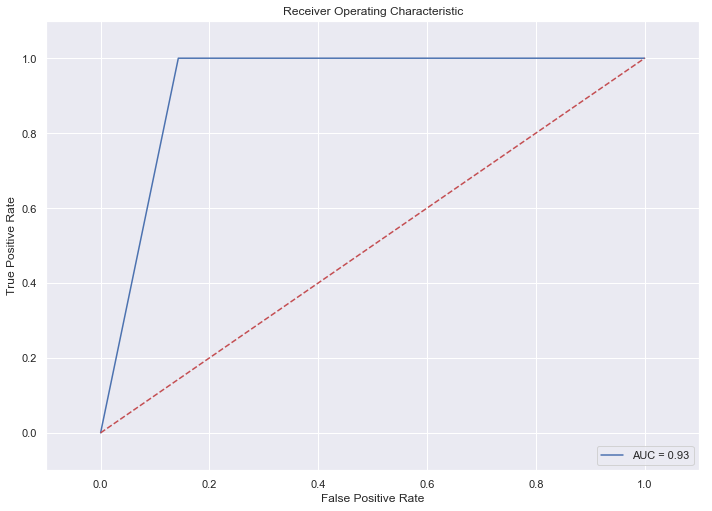

In [90]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC score is 0.93, which is a really good score and shows that logistict regression is a good model to predict target variable. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier. 